<div style="font-size:12pt; padding-top:6px; text-align:center"><i>Text-Mining 2024</div>
<div style="font-size:18pt; padding-top:0px; text-align:center"><b>Введение в машинное обучение</div> <hr>

# Что это такое?

![alt](https://i.ibb.co/QjnR9CR/2024-05-31-22-04-39.png)

# На самом деле немного сложнее:

![alt](https://habrastorage.org/r/w780/webt/uf/0t/6g/uf0t6gyvgn4ooh_14jda1locmmq.jpeg)


## Обычно выделяют четыре основных типа задач машинного обучения:
* 1. Обучение с учителем;
* 2. Обучение без учителя;
* 3. Обучение с частичным привлечениям учителя;
* 4. Обучение с подкреплением.
> [Подробнее](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B5_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5)

## STOP PANIC!
### Сегодня затроним перые два типа - **Обучение с учителем** и **Обучение без учителя**.
### Вы уже знакомы с ними, но, скорее всего, встречали под другими названиями:
* Регрессия (например, линейная регрессия);
* Классификация (например, логистическая регрессия);
* Кластеризация (например, k-means).
> К какому типу машинного обучения относится каждая из задач?


---
### В рамках этого занятия:
* Вспомним, что это такое;
* Посмотрим, как реализовать на питоне.




# Обучение с учителем
> Обучение с учителем является задачей обучения системы на тренировочном наборе данных. Путем подгонки результатов обучения к тренировочному набору данных, мы хотим найти наиболее оптимальные параметры модели для прогнозирования возможных ответов на других объектах (тестовых наборах данных).
- Регрессия;
- Классификация.

![alt](https://i.ibb.co/PgRNnLj/123.png)

## Посмотрим на пример построения регрессии.
> Классификацию разберем на одном из следующих занятий на примере определения тональности текста.

## Возьмем датасет с Kaggle - [House Rent Prediction](https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset)

#### В нем такие столбцы:
* BHK: Number of Bedrooms, Hall, Kitchen.
* Rent: Rent of the Houses/Apartments/Flats.
* Size: Size of the Houses/Apartments/Flats in Square Feet.
* Floor: Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)
* Area Type: Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.
* Area Locality: Locality of the Houses/Apartments/Flats.
* City: City where the Houses/Apartments/Flats are Located.
* Furnishing Status: Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.
* Tenant Preferred: Type of Tenant Preferred by the Owner or Agent.
* Bathroom: Number of Bathrooms.
* Point of Contact: Whom should you contact for more information regarding the Houses/Apartments/Flats

> Мы хотим предсказывать **Rent**.

In [ ]:
import pandas as pd

url = "https://drive.usercontent.google.com/u/0/uc?id=1jtF42Sdf514qt2ZhwLdny2oztoaXjbRA&export=download"

df = pd.read_csv(url)

In [ ]:
df.head(5)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [ ]:
df['City'].value_counts()

City
Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: count, dtype: int64

## Предобработаем данные и проведем feature engineering

In [ ]:
df_j = df.join(df['Floor'].str.split(' out of ', expand = True)).rename(columns = {0 : 'flat_floor',
                                                                                   1 : 'total_floors'})

In [ ]:
df_j.loc[df_j['flat_floor'] == 'Ground', 'flat_floor'] = 0
df_j.loc[df_j['flat_floor'].isin(['Upper Basement', 'Lower Basement']), 'flat_floor'] = -1

In [ ]:
df_j.drop(columns = ['Posted On', 'Floor', 'Area Locality'], inplace = True)

In [ ]:
df_j[['flat_floor', 'total_floors']] = df_j[['flat_floor', 'total_floors']].astype(float)

In [ ]:
df_j

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,flat_floor,total_floors
0,2,10000,1100,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0.0,2.0
1,2,20000,800,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1.0,3.0
2,2,17000,1000,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1.0,3.0
3,2,10000,800,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1.0,2.0
4,2,7500,850,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner,3.0,5.0
4742,3,29000,2000,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner,1.0,4.0
4743,3,35000,1750,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent,3.0,5.0
4744,3,45000,1500,Carpet Area,Hyderabad,Semi-Furnished,Family,2,Contact Agent,23.0,34.0


In [ ]:
# Из номинальных в бинарные. Вспомните из зачем мы так делаем?

objs = pd.get_dummies(columns = df_j.select_dtypes(include='object').columns,
                      data = df_j[df_j.select_dtypes(include='object').columns])

In [ ]:
f_data = df_j[df_j.select_dtypes(include=['int64', 'float']).columns].join(objs)

In [ ]:
def clear_column_names(data):
    return data.rename(columns={col: col.lower().replace(" ", "_") for col in data.columns.tolist()},
                        inplace = True)

In [ ]:
clear_column_names(f_data)

In [ ]:
f_data.columns

Index(['bhk', 'rent', 'size', 'bathroom', 'flat_floor', 'total_floors',
       'area_type_built_area', 'area_type_carpet_area', 'area_type_super_area',
       'city_bangalore', 'city_chennai', 'city_delhi', 'city_hyderabad',
       'city_kolkata', 'city_mumbai', 'furnishing_status_furnished',
       'furnishing_status_semi-furnished', 'furnishing_status_unfurnished',
       'tenant_preferred_bachelors', 'tenant_preferred_bachelors/family',
       'tenant_preferred_family', 'point_of_contact_contact_agent',
       'point_of_contact_contact_builder', 'point_of_contact_contact_owner'],
      dtype='object')

In [ ]:
f_data.isna().sum()

bhk                                  0
rent                                 0
size                                 0
bathroom                             0
flat_floor                           0
total_floors                         4
area_type_built_area                 0
area_type_carpet_area                0
area_type_super_area                 0
city_bangalore                       0
city_chennai                         0
city_delhi                           0
city_hyderabad                       0
city_kolkata                         0
city_mumbai                          0
furnishing_status_furnished          0
furnishing_status_semi-furnished     0
furnishing_status_unfurnished        0
tenant_preferred_bachelors           0
tenant_preferred_bachelors/family    0
tenant_preferred_family              0
point_of_contact_contact_agent       0
point_of_contact_contact_builder     0
point_of_contact_contact_owner       0
dtype: int64

In [ ]:
f_data.rename(columns = {'bhk' : 'rooms_cnt',
                    'rent' : 'rent_price',
                    'size' : 'size_square_feet',
                    'bathroom' : 'bathroom_cnt'}, inplace = True)

In [ ]:
# данные.дроп(какие удалить)

In [ ]:
f_data.drop(index=f_data[f_data['total_floors'].isna()].index, axis=0, inplace = True)

In [ ]:
f_data[f_data.select_dtypes(include=['int64', 'float']).columns] = f_data[f_data.select_dtypes(include=['int64', 'float']).columns].astype(float)

f_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4742 entries, 0 to 4745
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rooms_cnt                          4742 non-null   float64
 1   rent_price                         4742 non-null   float64
 2   size_square_feet                   4742 non-null   float64
 3   bathroom_cnt                       4742 non-null   float64
 4   flat_floor                         4742 non-null   float64
 5   total_floors                       4742 non-null   float64
 6   area_type_built_area               4742 non-null   bool   
 7   area_type_carpet_area              4742 non-null   bool   
 8   area_type_super_area               4742 non-null   bool   
 9   city_bangalore                     4742 non-null   bool   
 10  city_chennai                       4742 non-null   bool   
 11  city_delhi                         4742 non-null   bool   
 1

## ML STARTS HERE <----------



---


> **Первая итерация. Пробуем максимально базовый подход.** Baseline.


---



In [ ]:
y = f_data['rent_price']                # Таргетная переменная, которую мы хотим предсказать.
X = f_data.drop(columns = 'rent_price') # Признаки (фичи), по которым мы хотим предсказывать таргетную переменную;

### Мы хотим разбить наши данные, чтобы затем только часть показать модели для обучение, а на оставшихся проверить ее.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,              # Мы разбиваем наши данные на 4 выборки:
                                                     test_size=0.3,    # Обучающие данные: X_train и y_train
                                                     random_state=7,   # Тестовые данные:  X_test  и y_test
                                                     shuffle=True)

> Не всегда все так просто... Это называется **кросс-валидация** и она бывает разной степени интересности!   

> [Узнать подробнее.](https://education.yandex.ru/handbook/ml/article/kross-validaciya)

### Теперь давайте выберем модель, которую хотим использовать.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 1. Закидываем в переменную модель, которую хотим использовать;

model.fit(X_train, y_train) # 2. Обучаем модель на тренировочных данных;

y_predicts = model.predict(X_test) # 3. С помощью нашей обученной модели пробуем предсказать тестовые данные (модель их еще не видела - они не учавствовали в обучении).

### Следующий этап - хотим как-то оценить нашу модель. Она норм или не норм?

In [ ]:
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('R2: ', r2_score(y_test, y_predicts))
print('MSE: ', mean_squared_error(y_test, y_predicts))
print('RMSE: ', sqrt(mean_squared_error(y_test, y_predicts)))
print('MAE: ', mean_absolute_error(y_test, y_predicts))

R2:  0.1866861586519052
MSE:  10126803406.4722
RMSE:  100632.01978730329
MAE:  23839.99542827706


> Метрики кач-ва модели - это еще более интересная и глубокая тема.

> Детальнее про основные метрики регрессии и классификации [тут](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B0%D1%85_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D0%B8_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8).



---


> **Вторая итерация. Мы увидели, что наша модель так себе - пробудем ее файнтюнить (докрутить).**


---



In [ ]:
y.describe()

count    4.742000e+03
mean     3.500863e+04
std      7.813758e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: rent_price, dtype: float64

In [ ]:
y.min()

1200.0

In [ ]:
y.max()

3500000.0

In [ ]:
y.mean()

35008.629270350066

In [ ]:
y.median()

16000.0

#### Поработаем с нашим таргетом - возьмем логарифм от стоимости аренды.

In [ ]:
# Ну и удалим некорректную фичу :)

f_data.drop(index=f_data[(f_data['area_type_built_area'] == 1) | (f_data['point_of_contact_contact_builder'] == 1)].index,
             axis=0, inplace = True)

In [ ]:
import numpy as np

f_data['rent_price_log'] = np.log(f_data['rent_price'])

f_data.drop(columns = 'rent_price', inplace = True)

In [ ]:
y = f_data['rent_price_log']
X = f_data.drop(columns = 'rent_price_log')

In [ ]:
X['size_square_feet'].max()

8000.0

#### Стандартизируем наши данные.

In [ ]:
from sklearn.preprocessing import StandardScaler

num_df = X[X.select_dtypes(include='float').columns]

scaler = StandardScaler()
num_df_transform = scaler.fit_transform(num_df)
num_df_transform = pd.DataFrame(num_df_transform, index=num_df.index, columns=num_df.columns)

> Для тех, кто забыл, что такое [стандартизация.](https://datafinder.ru/products/standardscaler-v-mashinnom-obuchenii)

In [ ]:
# Было

X[X.select_dtypes(include='float').columns].head(3)

,rooms_cnt,size_square_feet,bathroom_cnt,flat_floor,total_floors
0,2.0,1100.0,2.0,0.0,2.0
1,2.0,800.0,1.0,1.0,3.0
2,2.0,1000.0,1.0,1.0,3.0


In [ ]:
# Стало

X[X.select_dtypes(include='float').columns] = num_df_transform[num_df_transform.select_dtypes(include='float').columns]

X[X.select_dtypes(include='float').columns].head(3)

,rooms_cnt,size_square_feet,bathroom_cnt,flat_floor,total_floors
0,-0.101181,0.208257,0.037932,-0.595856,-0.525380
1,-0.101181,-0.264631,-1.092627,-0.422693,-0.419796
2,-0.101181,0.050628,-1.092627,-0.422693,-0.419796


In [ ]:
X['size_square_feet'].max()

11.084685751529193

#### Посмотрим, какие рез-ты даст аналогичная модель по нашим новым данным:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                     test_size=0.3,
                                                     random_state=7,
                                                     shuffle=True)

model2 = LinearRegression()

model2.fit(X_train, y_train)

y_predicts = model2.predict(X_test)

print('R2: ', r2_score(y_test, y_predicts))
print('MSE: ', mean_squared_error(y_test, y_predicts))
print('RMSE: ', sqrt(mean_squared_error(y_test, y_predicts)))
print('MAE: ', mean_absolute_error(y_test, y_predicts))

R2:  0.8089889677523594
MSE:  0.17371259546520423
RMSE:  0.41678843009997796
MAE:  0.29449488182999256


#### Посмотрим на веса второй модели:

In [ ]:
sorted(list(zip(X.columns, model2.coef_)),
       key=lambda x: abs(x[1]))

[('point_of_contact_contact_builder', 0.0),
 ('area_type_built_area', -1.3877787807814457e-16),
 ('tenant_preferred_bachelors/family', 0.010387205913808902),
 ('area_type_super_area', -0.019857412790360615),
 ('area_type_carpet_area', 0.01985741279036075),
 ('flat_floor', 0.028945130673171237),
 ('furnishing_status_semi-furnished', -0.03580925811470319),
 ('total_floors', 0.048155021766725335),
 ('tenant_preferred_bachelors', 0.04958847374505539),
 ('tenant_preferred_family', -0.05997567965886427),
 ('city_delhi', 0.0853081623767931),
 ('city_bangalore', -0.10011909741674434),
 ('furnishing_status_unfurnished', -0.1319019687744356),
 ('bathroom_cnt', 0.1390759289425101),
 ('city_chennai', -0.14444093615439352),
 ('point_of_contact_contact_owner', -0.16678356140478623),
 ('point_of_contact_contact_agent', 0.16678356140478628),
 ('furnishing_status_furnished', 0.16771122688913875),
 ('rooms_cnt', 0.17491997646238083),
 ('city_hyderabad', -0.2503531324911756),
 ('size_square_feet', 0.2759

# Обучение без учителя
> Мы хотим наблюдать некоторое сходство между группами объектов и включать их в соответствующие кластеры. Некоторые объекты могут сильно отличаться от всех кластеров, и таким образом мы предполагаем, что эти объекты являются аномалиями.
- Кластеризация.

![alt](https://i.ibb.co/pbvs457/image-38.png)

## Посмотрим на примере датасета с Kaggle - [Wine Dataset.](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

#### В нем такие столбцы:
* Alcohol
* Malic acid
* Ash
* Alcalinity of ash
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
*Proline

> Мы хотим каким-то образом их сгруппировать - выделить похожие вина рядом в один сегмент и непохожие в другой.

In [ ]:
import pandas as pd

url = "https://drive.usercontent.google.com/u/0/uc?id=198zph4O7_HtqKW_zZ_VHJucNHRj0Hn1u&export=download"

df = pd.read_csv(url)

In [ ]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Построим дендрограмму

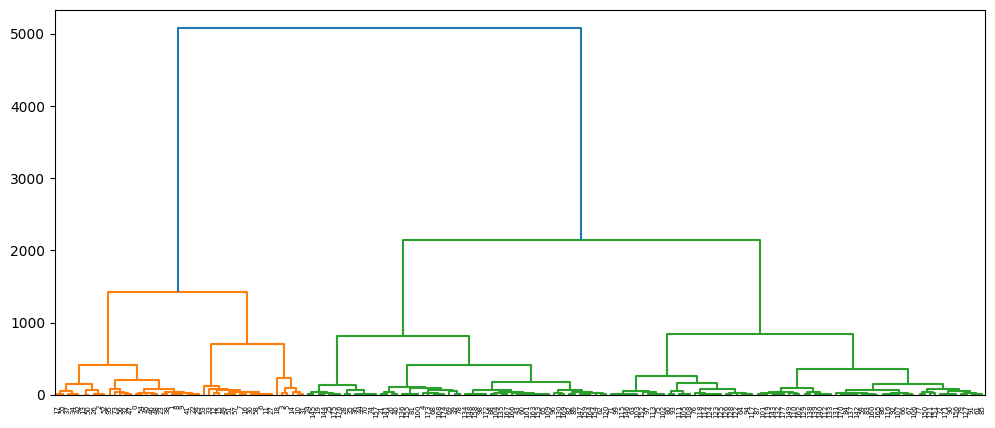

In [ ]:
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot

pyplot.figure(figsize=(12, 5))
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=6)

In [ ]:
y_model = model.fit_predict(df)

In [ ]:
y_model

array([3, 3, 3, 0, 1, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 5, 1, 1,
       3, 3, 5, 5, 3, 0, 5, 3, 0, 0, 3, 0, 3, 5, 5, 3, 3, 1, 1, 3, 3, 1,
       5, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 0, 2, 1, 2, 1, 4, 4, 1,
       2, 2, 1, 1, 5, 4, 2, 3, 5, 4, 4, 2, 1, 2, 4, 1, 1, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 4, 4, 3, 1, 4, 1, 4, 1, 2, 4, 4, 1, 4, 2, 2, 4, 1,
       2, 4, 2, 4, 4, 4, 2, 4, 4, 2, 1, 2, 4, 4, 4, 4, 4, 2, 4, 2, 1, 2,
       2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 5, 5, 4, 1, 1, 2, 2, 2, 4, 1,
       1, 1, 2, 5, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 5,
       5, 2])

In [ ]:
df['Cluster'] = y_model

In [ ]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


#### Теперь давайте визуализируем, что у нас получилось:

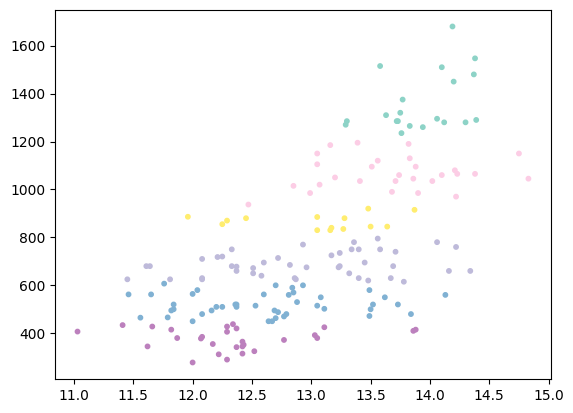

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(x = df['Alcohol'], y = df['Proline'], c=df['Cluster'], s=10, cmap = "Set3")

#### А теперь давайте попробуем поменять кол-во кластеров и посмотреть, что выйдет!